In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, inv
from scipy.linalg import solve_banded
from numpy.fft import rfft, irfft
import time

In [ ]:
def f(x):
    return 1 + (1/2)*np.tanh(2*x)
    

N = 100
x = np.linspace(-2, 2, N)
h = 1e-5

df_dx = (f(x + (h/2)) - f(x - h/2)) / h 

In [ ]:
analytical = 1 / np.cosh(2*x)**2

In [ ]:
plt.plot(x, df_dx, marker='.', label='numerical')
plt.plot(x, analytical, label='analytical')
plt.legend()

In [ ]:
print(analytical - df_dx)

In [ ]:
x

In [ ]:
def f1(x):
    return 1 + 1/(2*np.tanh(2*x))

def derive(f, x, h: int = 1e-5):
    return (f(x + (h/2)) - f(x - h/2)) / h 

df_dx1 = (f1(x + (h/2)) - f1(x - h/2)) / h 
# yarr = derive(f1, x)
analytical1 = -1 / (np.sinh(2*x)**2)

In [ ]:
plt.plot(x, df_dx1, marker='.', label='numerical')
# plt.plot(x, yarr, marker='.', label='numerical')
plt.plot(x, analytical1, label='tanh downstairs')
# plt.plot(x, analytical, label='tanh upstairs') 
# plt.ylim(-10000,10000)
# plt.xscale('log')
plt.legend()

In [ ]:
df_dx1

In [ ]:
yarr

# Interpolation

In [ ]:
x = [0,1,2,3,4]
f = [1.,2.,5.,10.,17.]

def interpolate(arr, f, x):
    idx = np.searchsorted(arr, x)
    print(idx)
    
    if idx == 0:
        return arr[0]
    elif idx == len(arr):
        return arr[-1]
    
    a, b = arr[idx - 1], arr[idx]
    print(a,b)
    
    y = f[a] + ((x - arr[a]) / (arr[b] - arr[a])) * (f[b] - f[a])
    
    return y

interpolated_value = interpolate(x, f, 1.3)
print(f"Interpolated value: {interpolated_value}")


# Gaussian Elimination with Backsub

In [ ]:
A = np.array([[2.,1,4,1],
             [3,4,-1,-1],
             [1,-4,1,5],
             [2,-2,1,3]])
v = np.array([-4.,3,9,7])


In [ ]:
# Volts problem
vA = np.array([[4.,-1,-1,-1],
               [-1,3,0,-1],
               [-1,0,3,-1],
               [-1,-1,-1,4]])
vv = np.array([5,0,5,0])

In [ ]:
################
# for-loops
################

# Gaussian elim
def gausselim(A,v):
    N = len(v)
    for m in range(N):
        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x
        
print(gausselim(vA,vv))

### Partial Pivoting

In [ ]:
A1 = np.array([[0,1.,4,1],
               [3,4,-1,-1],
               [1,-4,1,5],
               [2,-2,1,3]])

v1 = np.array([-4.,3,9,7])

In [ ]:
def part_pivot(A,v):
    N = len(v)
    for m in range(N):
        
        # check the row and swap if mth row 
        # does not have max value at mth element
        idx = np.argmax(np.abs(A[m:,m])) + m
        if idx != m:
            A[[m, idx], :] = A[[idx, m], :]
            v[[m, idx]] = v[[idx, m]]

        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x

In [ ]:
part_pivot(A,v)

In [ ]:
part_pivot(A1,v1)

In [ ]:
x = solve(A,v)
x

In [ ]:
X = inv(A)
X

### tridiagonal matrices

In [ ]:
# constants
N = 26
C = 1.
m = 1.
k = 6.
omega = 2.
alpha = 2*k-(m*omega**2)

# set up init values of arrays
A = np.zeros([N,N])
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
v = np.zeros(N)
v[0]=C

# print("A before Gaussian elim")
# print(A)

# Gussian elim
for i in range(N-1):

    # divide row i by its diagonal elem
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    # print(f"i: {i}")
    # print(f"A after division at i={i}")
    # print(A)

    # sub from next row down
    A[i+1,i+1] -= A[i+1, i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
    # print(f"A after subtracting next row at i={i}")
    # print(A)

# divide last elem of v by last diag elem
v[N-1] /= A[N-1, N-1]
# print("A after dividing last elem of v by last diag elem")
# print(v)

# backsub
x = np.zeros(N)
x[N-1] = v[N-1]
for i in range(N-2, -1, -1):
    x[i] = v[i] - A[i, i+1]*x[i+1]
    # print(x[i])

# plot
plt.plot(x)
plt.plot(x, "ko")
plt.show()

In [ ]:
A1 = np.zeros([3,N])
A1[0,:] = -k
A1[1,:] = alpha
A1[2,:] = -k
A1[1,0] = alpha - k
A1[1,N-1] = alpha - k

x1 = solve_banded((1,1),A1,v)
plt.plot(x1)
plt.plot(x1, 'ko')
plt.show()

## Nonlinear Equations

### relaxation method

In [ ]:
from math import exp

In [ ]:
c = np.arange(0,3.1,0.1)
x = 1

def fn(c):
    return 1 - np.exp(-c*x)

def relax(func, c, guess):
    for k in range(100):
        guess = func(c)
    return guess

solns = relax(fn, c, x) 

In [ ]:
for k in range(100):
    x = fn(c)

In [ ]:
plt.plot(c, solns, label=f'f(x)={solns[-1]:.3f}')
plt.xlabel('C')
plt.ylabel('x')
plt.legend()
plt.show()

In [ ]:
np.shape(solns)

## Newton-Raphson

In [ ]:
# example 6.4: inverse hyperbolic tangent

eps = 1e-12

def arctanh(u):
    x = 0.
    delta = 1.
    while np.abs(delta) > eps:
        delta = (np.tanh(x) - u)*np.cosh(x)**2
        x -= delta
    return x

# python/vectorization solution
arctanh_vec = np.vectorize(arctanh)
u_vals_vec = np.linspace(-0.99, 0.99, 100)
x_points_vec = arctanh_vec(u_vals)

# generic solution
u_vals_gen = np.linspace(-0.99, 0.99, 100)
x_points_gen = []
for u in u_vals:
    x_points_gen.append(arctanh(u))

plt.plot(u_vals_vec, x_points_vec, label='vecorization')
plt.scatter(u_vals_gen, x_points_gen, color='orange', alpha=0.4, label='generic')
plt.xlabel('u')
plt.ylabel('x')
plt.grid(alpha=0.4)
plt.legend()
plt.show()



In [ ]:
# Exercise 6.15: The roots of a polynomial

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, linestyle='--')
plt.show()

def Pp(x):
    return (6*924)*x**5 - (5*2772)*x**4 + (4*3150)*x**3 - (3*1680)*x**2 +(2*420)*x - 42

# Newton-Raphson method to find roots
def find_roots(guess_arr, eps=1e-10):
    roots = []
    for guess in guess_arr:
        delta = 1.
        iters = 0
        while np.abs(delta) > eps and iters < 1000:
            delta = P(guess) / Pp(guess)
            guess -= delta
            iters += 1
        if iters >= 1000:
            print("Reached max iterations for guess:", guess)
        roots.append(guess)
    return roots

root_guesses = np.array([0.05, 0.19, 0.4, 0.61, 0.82, 0.96])

# Find the roots using the Newton-Raphson method
roots = find_roots(root_guesses)

# Plot the polynomial and the found roots
x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals, label="P(x)")
plt.axhline(0, color='black', linestyle='--')

# Mark the roots on the plot
for i, root in enumerate(roots):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0

for i, guess in enumerate(root_guesses):
    if i == 0:
        plt.plot(guess, 0, 'bo', label='initial guess')
    else:
        plt.plot(guess, 0, 'bo')

plt.legend(loc='center')
plt.show()

# Print the roots to 10 decimal places
for i, root in enumerate(roots):
    print(f"Root {i+1}: {root:.10f}")

### Secant method

In [ ]:
# Exercise 6.16: The Lagrange Point

# constants
G = 6.674e-8     
M = 5.972e27         # mass Earth
m = 7.348e25         # mass moon
R = 3.844e10          # dist from Earth to moon
omega = 2.662e-6     # angular velo

# strting guess is 2/3 R
r1_guess = (2/3)*R
r2_guess = r1_guess + 1e5

######################
# SECANT METHOD
######################

def forces(r):
    return ( (G*M) / r**2 ) - ( (G*m) / (R - r)**2 ) - (omega**2*r)

def find_L1(x1, x2, eps: float=1e-4):
    delta = 1e4
    iters = 1
    while np.abs(delta) > eps and iters < 1000:
        delta = forces(x2) * ((x2 - x1) / (forces(x2) - forces(x1)))
        x1, x2 = x2, x2 - delta
        iters += 1
        if iters > 1000:
            print('Reached max iters')
    return x2

L1 = find_L1(r1_guess, r2_guess)
print(f'L1 is a distance {L1:.4e} cm from Earth.')

## Golden Ratio Search

In [ ]:
sigma = 1.
eps = 1e-6
z = (1+np.sqrt(5))/2

# function to calc Buckingham potential
def f(r):
    return (sigma/r)**6 - np.exp(-r/sigma)

# init posits of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4 - x1)/z
x3 = x1 + (x4 - x1)/z

# init values of function at points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# store the 'mins' found along the way
mins = []
# main
while x4 - x1 > eps:
    if f2 < f3:
        x4, f4 = x3, f3
        x3, f3 = x2, f2
        x2 = x4 - (x4 - x1)/z
        f2 = f(x2)
    else:
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        x3 = x1 + (x4 - x1)/z
        f3 = f(x3)
    mins.append(0.5*(x1+x4))

final_min = mins[-1]
print(f"The min falls at {final_min} nm")

###############################
# make a plot of the potential
################################
# Create a colormap from yellow to red
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1, len(mins)))

r_vals = np.linspace(0.5, sigma*10, 1000)
fig = plt.figure(figsize=(20,15))
plt.plot(r_vals/sigma, f(r_vals))
plt.axvline(final_min, ls='dotted', color='red')
# for i, color in enumerate(colors):
#     plt.axvline(mins[i]/sigma, ls='--', color=color)
plt.ylim(-0.2, 0.2)  # Set y-limit to match the reference plot
plt.xlim(0, 8)       # Set x-limit to match the reference plot
plt.grid(True, alpha=0.5)
plt.axhline(0, ls='--', color='black')
plt.show()

In [ ]:
### Newton's method

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def PP(x):
    return (6*924)*x**5 - (5*2772)*x**4 + (4*3150)*x**3 - (3*1680)*x**2 +(2*420)*x - 42

x = np.linspace(0, 1, 1000)
plt.plot(x, P(x))
plt.axhline(0, ls='--', alpha=0.6)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
# Newton-Raphson method to find roots
def find_roots(guess_arr, f=P, fp=PP, eps=1e-10):
    roots = []
    iters_arr = []
    for guess in guess_arr:
        delta = 1.
        iters = 0
        while np.abs(delta) > eps and iters < 1000:
            delta = P(guess) / PP(guess)
            guess -= delta
            iters += 1
        if iters >= 1000:
            print("Reached max iterations for guess:", guess)
        iters_arr.append(iters)
        roots.append(guess)
    return roots, iters_arr

def find_roots_secant(guess_arr, f=P, eps=1e-10):
    roots = []
    iters_arr = []
    for i, guess in enumerate(guess_arr):
        x1 = guess
        x2 = guess+2*eps
        delta = 1.
        iters = 0
        while np.abs(delta) > eps:
            delta = f(x2)*((x2 - x1) / f(x2) - f(x1))
            x1, x2 = x2, x2-delta
            iters += 1
            if iters >= 1000:
                print("Reached max iterations for guess:", guess)
                break
        iters_arr.append(iters)
        roots.append(x2)
    return roots, iters_arr

root_guesses = np.array([0.05, 0.19, 0.4, 0.61, 0.82, 0.96])

# Find the roots using the Newton-Raphson method
roots, num_iters = find_roots(root_guesses)
roots_sec, num_iters_sec = find_roots_secant(root_guesses)

# Plot the polynomial and the found roots
x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

In [ ]:
# Mark the roots on the plot
for i, root in enumerate(roots):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0

for i, root in enumerate(roots_sec):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots_sec')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0


for i, guess in enumerate(root_guesses):
    if i == 0:
        plt.plot(guess, 0, 'bo', label='initial guess')
    else:
        plt.plot(guess, 0, 'bo')
plt.plot(x_vals, y_vals, label="P(x)")
plt.grid()
plt.axhline(0, ls='--')
plt.legend(loc='center')
plt.show()

# Print the roots to 10 decimal places
for i, root in enumerate(roots):
    print(f"Root {i+1}: {root:.12f} found in {num_iters[i]} iterations.")

In [ ]:
for guess in root_guesses:
    print(guess)

## Fourier Transforms

Function to evaluate equation (7.15)

$c_k = \sum_{n=0}^{N-1}y_n\exp(-i\frac{2\pi kn}{N})$

for N real samples $y_n$ for all $k$ in the range $0\leq k\leq N/2$

In [ ]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1, dtype=complex)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

y = np.loadtxt('pitch.txt')
c = dft(y)
# Visualize the Fourier transform magnitude
plt.plot(np.abs(c))
plt.title('DFT Magnitude')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
# Parameters for the signal
sampling_rate = 1000  # samples per second
duration = 1  # seconds
fundamental_frequency = 20  # Hz, fundamental frequency
harmonic2_frequency = 2 * fundamental_frequency  # 2nd harmonic
harmonic3_frequency = 3 * fundamental_frequency  # 3rd harmonic
amplitude = 1  # amplitude of the fundamental signal

# Generate time points
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the fundamental sine wave
signal_fundamental = amplitude * np.sin(2 * np.pi * fundamental_frequency * t)

# Generate the harmonics (2nd and 3rd harmonics)
signal_harmonic2 = (amplitude / 2) * np.sin(2 * np.pi * harmonic2_frequency * t)
signal_harmonic3 = (amplitude / 3) * np.sin(2 * np.pi * harmonic3_frequency * t)

# Combine the fundamental signal with its harmonics
combined_signal = signal_fundamental + signal_harmonic2 + signal_harmonic3

# Add some noise to the signal
noise = 0.2 * np.random.normal(size=combined_signal.shape)
noisy_signal = combined_signal + noise

# # Save the signal to a txt file
# file_path = '/Users/jaba_the_what/CUNY/CUNY_coursework/CM/code/noisy_pitch1.txt'
# np.savetxt(file_path, noisy_signal)

# Plot the signal
plt.plot(noisy_signal)
plt.title('Noisy Harmonic Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
c = dft(noisy_signal)
# Visualize the Fourier transform magnitude
plt.plot(np.abs(c), label='FT of noisy signal')
plt.title('DFT Magnitude')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.axvline(fundamental_frequency, ls='dotted', c='r', label='frequency of sine wave in noisy signal')
plt.legend()
plt.show()

In [ ]:
# exercise 7.1: FTs of simple functions
from scipy.signal import square, sawtooth

N = 1000   # number of sample points
t = np.linspace(0, 1, N, endpoint=False)  # time points

# part a: a single cycle of a square-wave with amplitude 
square_wave = square(2*np.pi*t)

# part b: sawtooth wave y_n = n
sawtooth_wave = sawtooth(2*np.pi*t)

# part c: modulated sine wave
modulated_wave = np.sin(np.pi*t) + np.sin(20*np.pi*t)


# plt.plot(t, sq)
# plt.show()
# plt.plot(t, st)
# plt.show()
# plt.show(t, yn)

# Compute the DFT of each signal
c_square = dft(square_wave)
c_sawtooth = dft(sawtooth_wave)
c_modulated = dft(modulated_wave)
c_square_fft = np.fft.rfft(square_wave)
c_sawtooth_fft = np.fft.rfft(sawtooth_wave)
c_modulated_fft = np.fft.rfft(modulated_wave)

# Create a 3x2 grid for plotting
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Row 1: Square wave and its FT
axs[0, 0].plot(t, square_wave)
axs[0, 0].set_title('Square Wave')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')

axs[1, 0].plot(np.abs(c_square))
axs[1, 0].set_title('Fourier Transform of Square Wave')
axs[1, 0].set_xlabel('Frequency (k)')
axs[1, 0].set_ylabel('Magnitude')

axs[2, 0].plot(np.abs(c_square_fft))
axs[2, 0].set_title('Fast Fourier Transform of Square Wave')
axs[2, 0].set_xlabel('Frequency (k)')
axs[2, 0].set_ylabel('Magnitude')

# Row 2: Sawtooth wave and its FT
axs[0, 1].plot(t, sawtooth_wave)
axs[0, 1].set_title('Sawtooth Wave')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(np.abs(c_sawtooth))
axs[1, 1].set_title('Fourier Transform of Sawtooth Wave')
axs[1, 1].set_xlabel('Frequency (k)')
axs[1, 1].set_ylabel('Magnitude')

axs[2, 1].plot(np.abs(c_sawtooth_fft))
axs[2, 1].set_title('Fast Fourier Transform of Sawtooth Wave')
axs[2, 1].set_xlabel('Frequency (k)')
axs[2, 1].set_ylabel('Magnitude')

# Row 3: Modulated sine wave and its FT
axs[0, 2].plot(t, modulated_wave)
axs[0, 2].set_title('Modulated Sine Wave')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(np.abs(c_modulated))
axs[1, 2].set_title('Fourier Transform of Modulated Sine Wave')
axs[1, 2].set_xlabel('Frequency (k)')
axs[1, 2].set_ylabel('Magnitude')

axs[2, 2].plot(np.abs(c_modulated_fft))
axs[2, 2].set_title('Fast Fourier Transform of Modulated Wave')
axs[2, 2].set_xlabel('Frequency (k)')
axs[2, 2].set_ylabel('Magnitude')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
# exercise 7.3: Fourier transforms of musical instruments

def read_plot_transform(filename, num_coeffs: int=10000):
    y = np.loadtxt(filename)
    c = rfft(y)

    fig, axs = plt.subplots(1,2, figsize=(15,10))
    axs[0].plot(np.arange(len(y)), np.abs(y))
    axs[0].set_xlabel('sample points')
    axs[0].set_ylabel('frequency')
    axs[0].set_title(f'{filename} sample')
    axs[1].plot(np.arange(num_coeffs), np.abs(c[:num_coeffs]))
    axs[1].set_xlabel(r'$c_k$')
    axs[1].set_ylabel('coefficient magnitude')
    axs[1].set_title(f'{filename} FFT')
    plt.show()

read_plot_transform('piano.txt')
read_plot_transform('trumpet.txt')

In [ ]:
# in class exercise: sunspots
month, spots = np.loadtxt('sunspots.txt').T
c = dft(spots)
c = c[1:]

plt.figure(figsize=(15,10))
plt.plot(month/12, spots)
plt.xlabel('number of months')
plt.ylabel('number of sunspots')
plt.show()
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(c)), np.abs(c)**2)
plt.axvline(np.argmax(c), label=f'{np.argmax(c)}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [ ]:
test = np.array([1,2,3,4])
test[1:]

In [ ]:
# exercise 7.4: Fourier filtering and smoothing

def sparse_inverse(filename, keep_fraction: float=0.1):
    y = np.loadtxt(filename)
    c = rfft(y)
    cutoff = int(len(c)*keep_fraction)
    c[cutoff:] = 0
    f_sparse = irfft(c)

    plt.plot(y, color='blue', label='original data')
    plt.plot(f_sparse, color='red', label='inverse sparse FT')
    plt.title(f'Sparse Inverse FFT ({keep_fraction*100}%)')
    plt.legend()
    plt.show()

sparse_inverse('dow.txt')
sparse_inverse('dow.txt', keep_fraction=0.02)

In [ ]:
# exercise 7.5
from scipy.signal import square, sawtooth


def smooth_square(N: int=1000, cutoff: int=10, cycles: int=1):
    # construct the square wave 
    N = 1000   # number of sample points
    t = np.linspace(0, 1, N, endpoint=False)  # time points
    
    # part a: a single cycle of a square-wave with amplitude 
    square_wave = square((2*cycles)*np.pi*t)
    c = rfft(square_wave)
    c[cutoff:] = 0
    c = irfft(c)
    
    plt.plot(t, square_wave, label='original function')
    plt.plot(t, c, label='inverse FT')
    plt.title(f'Square function and inverse DFT: cycles={cycles}')
    plt.legend(loc='best')
    plt.show()

smooth_square()
smooth_square(cycles=2)
smooth_square(cycles=10)
smooth_square(cutoff=100)
smooth_square(cutoff=100, cycles=2)
smooth_square(cutoff=100, cycles=10)

In [ ]:
# exercise 7.6

sparse_inverse('dow2.txt', keep_fraction=0.02)

In [ ]:
from dcst import dct, idct

y = np.loadtxt('dow2.txt')
c = dct(y)
c[int(len(c)*0.02):] = 0
c = idct(c)

plt.plot(np.arange(len(y)), y, label='original data')
plt.plot(np.arange(len(c)), c, label='inverse sparse DCT')
plt.legend()
plt.show()

## Euler's Method

In [ ]:
def f(x,t):
    return -x**3 + np.sin(t)

a = 0
b = 10
N = 1000
h = (b - a) / N   # size of one step
t_vals = np.arange(a,b,h)  # evaluation points

def euler(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   # init condit
    for t in eval_points:
        x_vals.append(x)
        x += step*f(x,t)
    return x_vals

start = time.time()
f_x_vals = euler(f, t_vals, h, 0)
end = time.time()

In [ ]:
plt.plot(t_vals, f_x_vals)
plt.show()

## Second-Order-Runge-Kutta 

In [ ]:
a1= 0
b1= 10
N1= 100
h1= (b1 - a1) / N1   # size of one step
t_vals1= np.arange(a1,b1,h1)  # evaluation points

def rk_2(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   
    for t in eval_points:
        x_vals.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x + (0.5*k1), t + (0.5*h))
        x += k2
    return x_vals

start1 = time.time()
fx_vals_rk = rk_2(f, t_vals1, h1, 0.)
end1 = time.time()

print(f'Time to run Euler\'s method: {end-start:.02e}s')
print(f'Time to run second-order-RK: {end1-start1:.02e}s')

plt.plot(t_vals1, fx_vals_rk, label='2O-Runge-Kutta')
plt.plot(t_vals, f_x_vals, label='Euler\'s')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Fourth-Order-RK

In [ ]:
a2 = 0
b2 = 10
N2 = 100
h2 = (b2 - a2) / N2   # size of one step
t_vals2 = np.arange(a2, b2, h2)  # evaluation points

def rk_4(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   
    for t in eval_points:
        x_vals.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
    return x_vals

start2 = time.time()
fx_vals_rk4 = rk_4(f, t_vals2, h2, 0.)
end2 = time.time()

print(f'Time to run Euler\'s method: {end-start:.02e}s')
print(f'Time to run second-order-RK: {end1-start1:.02e}s')
print(f'Time to run fourth-order-RK: {end2-start2:.02e}s')

plt.plot(t_vals1, fx_vals_rk, label='2O-Runge-Kutta')
plt.plot(t_vals2, fx_vals_rk4, label='4O-Runge-Kutta')
plt.plot(t_vals, f_x_vals, label='Euler\'s')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

### solving ODE over infinite range

In [ ]:
def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.
b = 1.
N = 100
h = (b - a)/N

upoints = np.arange(a, b, h)

def inode(g, init):
    tpoints = []
    xpoints = []
    x = init
    for u in upoints:
        tpoints.append(u/(1-u))
        xpoints.append(x)
        k1 = h*g(x,u)
        k2 = h*g(x+0.5*k1,u+0.5*h)
        k3 = h*g(x+0.5*k2,u+0.5*h)
        k4 = h*g(x+k3,u+h)
        x += (k1+2*k2+2*k3+k4)/6
    return xpoints, tpoints

xpoints, tpoints = inode(g, 1.)
plt.plot(tpoints, xpoints)
plt.show()

### simultaneous first-order ODEs

In [ ]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tpoints,xpoints, label='x(t)')
plt.plot(tpoints,ypoints, label='y(t)')
plt.plot(tpoints, np.array(xpoints)+np.array(ypoints), label='x(t)+y(t)')
plt.xlabel("t")
plt.ylabel('f(x,y,t)')
plt.legend()
plt.show()

## Random Processes

In [42]:
# exercise 10.1: rolling dice
def roll_dice(num_dice: int=2):
    for i in range(num_dice):
        print(f'Dice {i}: {np.random.randint(1,7)}')

# roll_dice()

def roll_dice_experiment_slow(num_rolls: int=1e6):
    count_sixes = 0.
    for roll in range(int(num_rolls)):
        dice1 = np.random.randint(1,7)
        dice2 = np.random.randint(1,7)
        if dice1 == 6 and dice2 == 6:
            count_sixes += 1
    return count_sixes / num_rolls

def roll_dice_experiment_fast(num_rolls: int=1e6):
    dice1 = np.random.randint(1, 7, size=int(num_rolls))
    dice2 = np.random.randint(1, 7, size=int(num_rolls))
    sixes = np.sum((dice1 == 6) & (dice2 == 6))
    return sixes / num_rolls

print(f'1/36 is about {1/36:.04f}')
# start_slow = time.time()
# print(f'Experiment results (for-loop): {roll_dice_experiment_slow(num_rolls=1e8):.04f}')
# end_slow = time.time()
# print(f'compute time: {end_slow-start_slow:.03e}')
start_fast = time.time()
print(f'Experiment results (vectorized): {roll_dice_experiment_fast(num_rolls=1e8):.04f}')
end_fast = time.time()
print(f'compute time: {end_fast-start_fast:.03e}')

1/36 is about 0.0278
Experiment results (vectorized): 0.0278
compute time: 1.334e+00


In [ ]:
def flip_coin(num_flips: int=10000):
    count_heads = 0.
    count_tails = 0.
    for i in range(int(num_flips)):
        if np.random.rand() < 0.2:
            count_heads += 1
        else:
            count_tails += 1
    print(f'heads: {count_heads}')
    print(f'tails: {count_tails}')

def flip_coin_fast(num_flips: int=10000):
    flips = np.random.rand(int(num_flips))
    count_heads = np.sum(flips < 0.2)
    count_tails = num_flips - count_heads
    print(f'heads: {count_heads}')
    print(f'tails: {count_tails}')

start_slow = time.time()
flip_coin(num_flips=1e7)
end_slow = time.time()
start_fast = time.time()
flip_coin_fast(num_flips=1e6)
end_fast = time.time()
print(f'compute time (for-loop): {end_slow-start_slow:.04e}')
print(f'compute time (vectorized): {end_fast-start_fast:.04e}')

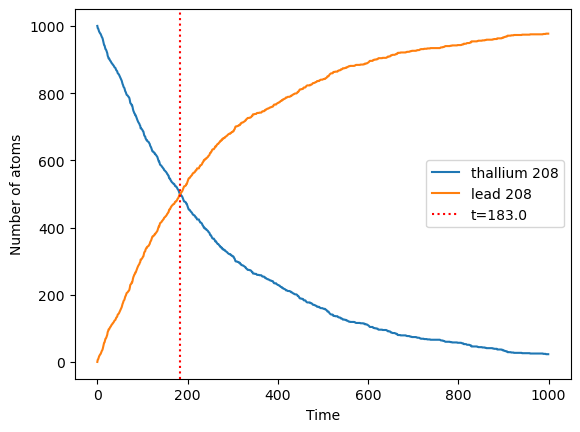

In [52]:
# example 10.1: decay of an isoptope

NTl = 1000
NPb = 0
tau = 3.053*60        # seconds
h = 1.                # time step in seconds
p = 1 - 2**(-h/tau)
tmax = 1000           # total time

tpoints = np.arange(0., tmax, h)
Tlpoints = []
Pbpoints = []
idx = None

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # decay = 0
    # for i in range(NTl):
    #     if np.random.random() < p:
    #         decay += 1
    
    decay = np.sum(np.random.rand(NTl) < p)
    
    NTl -= decay
    NPb += decay
    
    if NTl == NPb:
        idx = t

plt.plot(tpoints,Tlpoints, label='thallium 208')
plt.plot(tpoints,Pbpoints, label='lead 208') 
plt.axvline(idx, ls='dotted', c='r', label=f't={idx}')
plt.xlabel("Time")
plt.ylabel("Number of atoms") 
plt.legend()
plt.show()

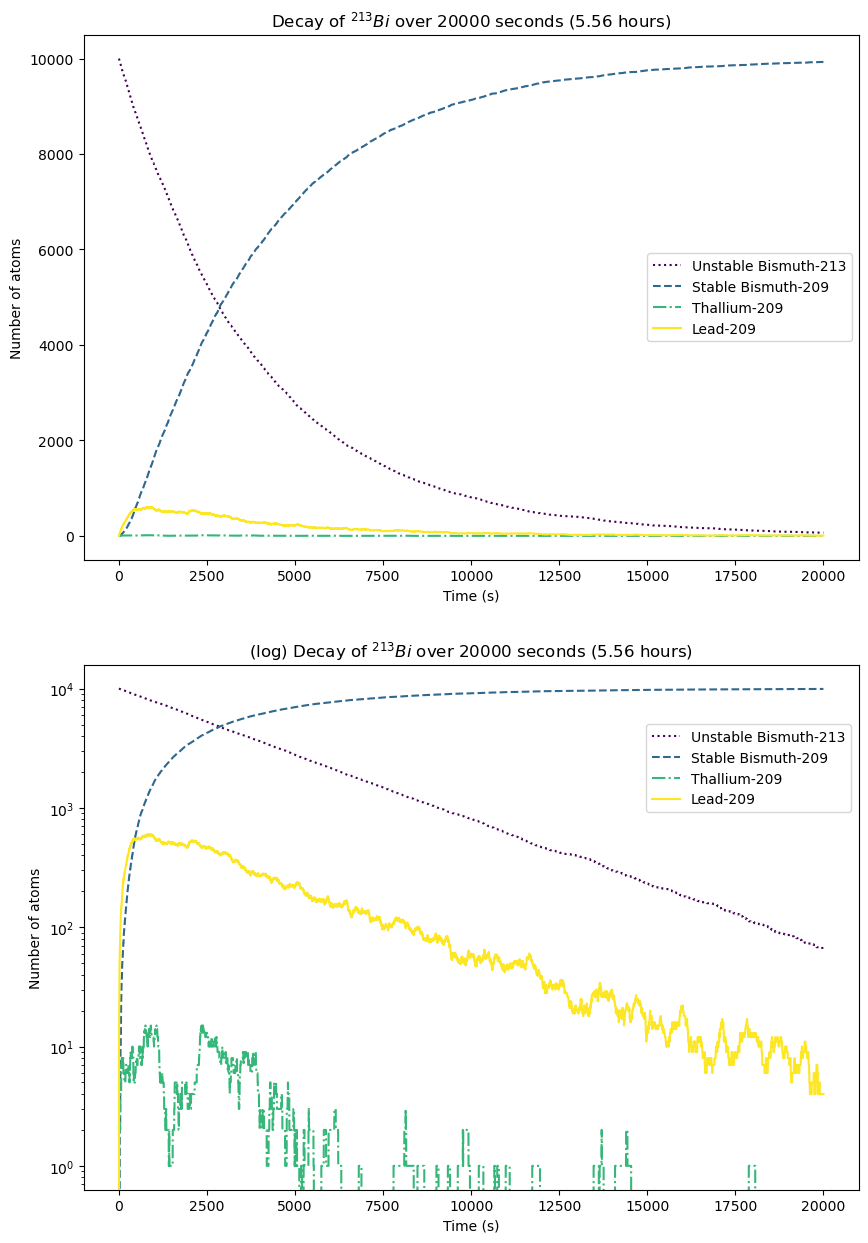

In [107]:
# exercise 10.2: radiocative decay chain
NBi_unstable = 10000
NTl = 0
NPb = 0
NBi_stable = 0
tau_Bi = 46*60   # seconds
tau_Tl = 2.2*60
tau_Pb = 3.3*60
h = 1.     # time step in seconds
tmax = 20000           # total time

def p(tau):
    return 1 - 2**(-h/tau)

# set p(tau)
pBi = p(tau_Bi)
pTl = p(tau_Tl)
pPb = p(tau_Pb)

tpoints = np.arange(0., tmax, h)
Bipoints_unstable = []
Tlpoints = []
Pbpoints = []
Bipoints_stable = []

for t in tpoints:
    Bipoints_unstable.append(NBi_unstable)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bipoints_stable.append(NBi_stable)

    Pb_decay = 0
    Tl_decay = 0
    Bi_decay_Tl = 0
    Bi_decay_Pb = 0
    
    Pb_decay = np.sum(np.random.rand(NPb) < pPb)

    NPb -= Pb_decay
    NBi_stable += Pb_decay

    Tl_decay = np.sum(np.random.rand(NTl) < pTl)

    NTl -= Tl_decay
    NPb += Tl_decay

    bi_decay = np.random.rand(NBi_unstable) < pBi
    Bi_decay_Tl = np.sum(bi_decay & (np.random.rand(NBi_unstable) < 0.0209))
    Bi_decay_Pb = np.sum(bi_decay) - Bi_decay_Tl
            
    NBi_unstable -= (Bi_decay_Tl + Bi_decay_Pb)
    NTl += Bi_decay_Tl
    NPb += Bi_decay_Pb

# Get the viridis colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 4))  # Generate 4 colors from the colormap

fig, axs = plt.subplots(2, 1, figsize=(10,15))

# Plot the results using the colormap
axs[0].plot(tpoints, Bipoints_unstable, label='Unstable Bismuth-213', color=colors[0], ls='dotted')
axs[0].plot(tpoints, Bipoints_stable, label='Stable Bismuth-209', color=colors[1], ls='--')
axs[0].plot(tpoints, Tlpoints, label='Thallium-209', color=colors[2], ls='dashdot')
axs[0].plot(tpoints, Pbpoints, label='Lead-209', color=colors[3], ls='solid')
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Number of atoms") 
axs[0].set_title(r'Decay of $^{213}Bi$ over 20000 seconds (5.56 hours)')
axs[0].legend()

axs[1].plot(tpoints, Bipoints_unstable, label='Unstable Bismuth-213', color=colors[0], ls='dotted')
axs[1].plot(tpoints, Bipoints_stable, label='Stable Bismuth-209', color=colors[1], ls='--')
axs[1].plot(tpoints, Tlpoints, label='Thallium-209', color=colors[2], ls='dashdot')
axs[1].plot(tpoints, Pbpoints, label='Lead-209', color=colors[3], ls='solid')
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Number of atoms") 
axs[1].set_yscale('log')
axs[1].set_title(r'(log) Decay of $^{213}Bi$ over 20000 seconds (5.56 hours)')
axs[1].legend(bbox_to_anchor=(0.999, 0.9))

# fig.legend()
plt.colormaps()
plt.show()

In [131]:
# Grid size (LxL)
L = 101

# Defining the number of steps
n = 10000

# Creating two arrays for containing x and y coordinates
# of size equal to the number of steps and filled up with 0's
x = np.zeros(n, dtype=int)
y = np.zeros(n, dtype=int)

# Starting point (center of the grid)
x[0] = L // 2
y[0] = L // 2

# Filling the coordinates with random variables while ensuring movement stays within bounds
for i in range(1, n):
    valid_move = False
    while not valid_move:
        val = random.randint(1, 4)
        if val == 1 and x[i - 1] < L - 1:  # one step right if not at boundary
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
            valid_move = True
        elif val == 2 and x[i - 1] > 0:  # one step left if not at boundary
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
            valid_move = True
        elif val == 3 and y[i - 1] < L - 1:  # one step up if not at boundary
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
            valid_move = True
        elif val == 4 and y[i - 1] > 0:  # one step down if not at boundary
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
            valid_move = True

for i in range(n):
    plt.savefig

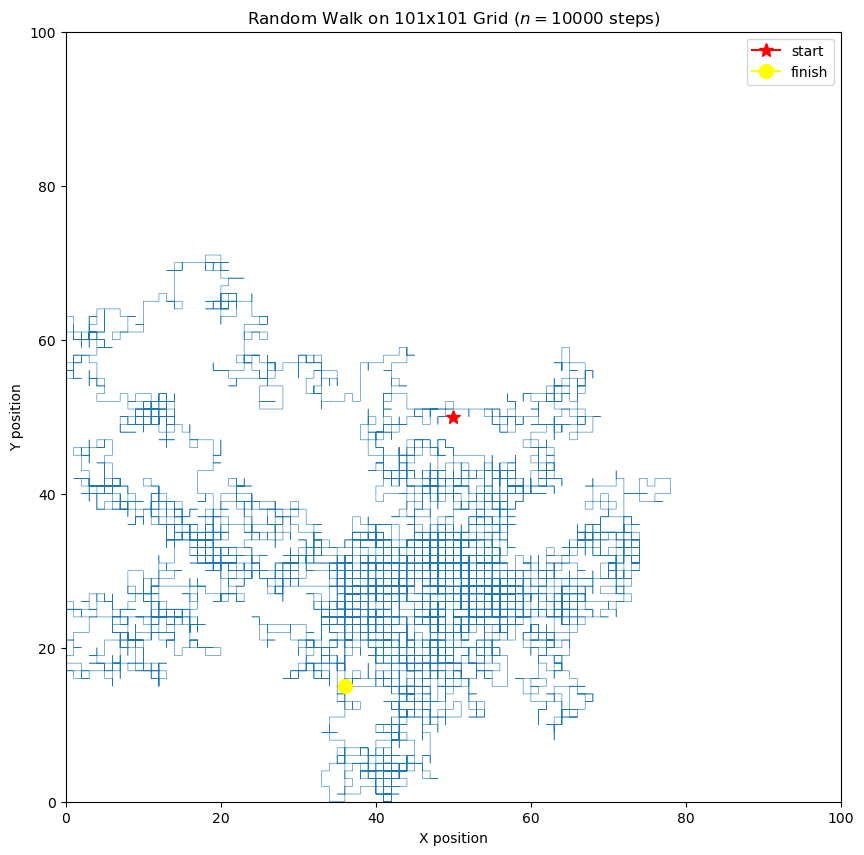

In [132]:
# Plotting the random walk
plt.figure(figsize=(10, 10))
plt.title(f"Random Walk on {L}x{L} Grid ($n = {n}$ steps)")
plt.plot(x, y, lw=0.4)
plt.plot(x[0], y[0], color='red', marker='*', ms=10, label='start')
plt.plot(x[-1], y[-1], color='yellow', marker='o', ms=10, label='finish')
plt.xlim(0, L - 1)
plt.ylim(0, L - 1)
# plt.grid(True)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend(loc='upper right')
plt.show()

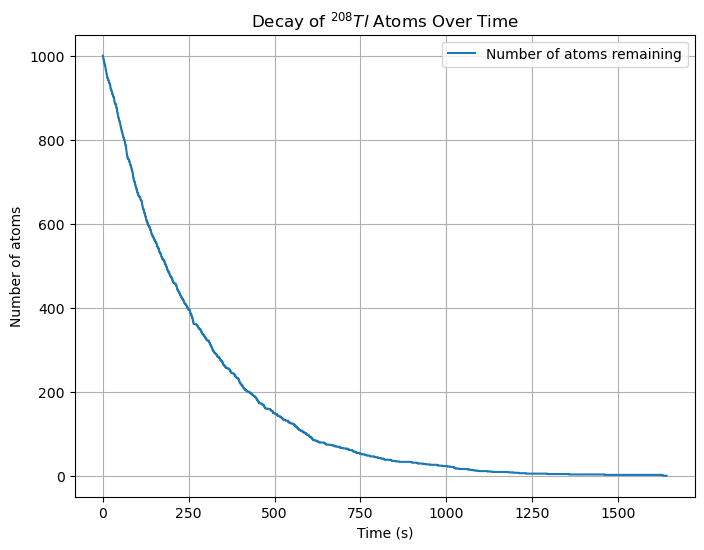

In [115]:
# exercise 10.4: radioactive decay again

tau = 3.053 * 60  # half-life in seconds
NTl = 1000  # number of atoms
Ntpoints = 10000  # number of random decay times to generate

# Generate decay times using the transformation method
'''
p(t) = 1 - 2**(-t/tau)
p(t) = u
2**(-t/tau) = 1-u
(-t/tau) = log(2)(1-u)
t = -tau*log(2)(1-u)
'''

u = np.random.rand(NTl)
decay_times = -tau * np.log2(1 - u)

# Sort the decay times
sorted_decay_times = np.sort(decay_times)

# Time points for plotting
tmax = int(np.max(sorted_decay_times)) + 10  # max time + 10 for padding
tpoints = np.linspace(0, tmax, Ntpoints)

# Calculate the number of atoms remaining at each time point
atoms_remaining = [np.sum(sorted_decay_times > t) for t in tpoints]

# Plotting the number of atoms remaining as a function of time
plt.figure(figsize=(8, 6))
plt.plot(tpoints, atoms_remaining, label='Number of atoms remaining')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.title(r'Decay of $^{208}Tl$ Atoms Over Time')
plt.grid(True)
# plt.xscale('log')
plt.legend()
plt.show()


In [44]:
# Example 10.2: Rutherford Scattering

# Constants
z = 79    # Atomic number of gold (e.g., for gold foil)
e = 1.602e-19  # Elementary charge (Coulombs)
E = e * 7.7e6  # Kinetic energy of the incident particle (Joules)
eps0 = 8.854e-12  # Permittivity of free space (F/m)
a0 = 5.292e-11  # Bohr radius (m)
sigma = a0 / 100  # Standard deviation (m)
N = 1000000  # Number of particles

def gaussian():
    x = np.random.normal(scale=sigma)
    y = np.random.normal(scale=sigma)
    return x, y

# Calculate the constant for the impact parameter
b_critical = (z * e**2) / (2 * np.pi * eps0 * E)

def count_bounceback(N):
    count = 0
    for i in range(N):
        x, y = gaussian()
        b = np.sqrt(x**2 + y**2)  # Calculate the impact parameter
        if b < b_critical:
            count += 1
    return count

counts = []
[counts.append(count_bounceback(N)) for _ in range(10)]

print(f'Average particles reflected out of {N}: {np.mean(counts)}')

Average particles reflected out of 1000000: 1568.8


### Monte Carlo Integration

In [88]:
# hit-or-miss

def f(x):
    return (np.sin(1/(x*(2-x))))**2

A = 2.   # area of function space
N = 1000000
k = 0
x_vals = np.random.rand(N)

# k = np.sum(np.random.rand(N) < (lambda x: (np.sin(1/(x*(2-x))))**2)(A * np.random.rand(N)))
I_hit_miss = (A*np.sum(np.random.rand(N) < (lambda x: (np.sin(1/(x*(2-x))))**2)(A * np.random.rand(N))))/N
error_hit_miss = np.sqrt(I*(A-I_hit_miss) / N)

print(f'Hit-or-miss value for I: {I_hit_miss}')
print(f'Hit-or-miss error: {error_hit_miss:.04e}')

# mean value method

I_mean_value = 2/N*np.sum(f(x_vals))

f_mean = np.mean(f(x_vals))
f_2mean = np.mean(f(x_vals)**2)
var_f = f_2mean - f_mean**2
error_mean_value = 2*np.sqrt(var_f/N)


print(f'Mean value for I: {I_mean_value}')
print(f'Mean value error: {error_mean_value:.04e}')

Hit-or-miss value for I: 1.452472
Hit-or-miss error: 8.9278e-04
Mean value for I: 1.451316295560316
Mean value error: 5.2739e-04


**Error**

Monte Carlo error improves according to the binomial distribution as $\sqrt(N)^{-1}$. Slow decrease in error compared to trapz ($1/N^2$) and Simpson's ($1/N^4$).

### Integrals in Many Dimensions 

In [87]:
# exercise 10.7: volume of a hypersphere

def monte_carlo_volume(dimensions, num_points):
    # Generate random points within the hypercube [-1, 1] for each dimension
    points = np.random.uniform(-1, 1, (num_points, dimensions))
    # print(np.shape(points))
    
    # Calculate the squared distance of each point from the origin
    squared_distances = np.sum(points**2, axis=1)
    # print(np.shape(squared_distances))
    
    # Count the number of points inside the hypersphere (distance <= 1)
    inside_hypersphere = np.sum(squared_distances <= 1)
    
    # Calculate the volume of the hypercube (2^dimensions)
    hypercube_volume = 2**dimensions
    
    # Estimate the volume of the hypersphere
    hypersphere_volume = (hypercube_volume * inside_hypersphere) / num_points
    
    return hypersphere_volume

# Example usage
dimensions = 10
num_points = 1000000  # Number of random points to generate
estimated_volume = monte_carlo_volume(dimensions, num_points)
print(f"Estimated volume of the {dimensions}-dimensional unit hypersphere: {estimated_volume}")


Estimated volume of the 10-dimensional unit hypersphere: 2.495488


In [36]:
def importance_sampling_integral(num_points):
    # Generate uniform random numbers
    u = np.random.uniform(0, 1, num_points)
    
    # Transform the uniform numbers using x = u^2
    x_samples = u**2
    
    # Calculate the function values at the sampled points
    function_values = 2 / (np.exp(x_samples) + 1)
    
    # Estimate the integral as the mean of the function values
    integral_estimate = np.mean(function_values)
    
    return integral_estimate

# Example usage
num_points = 1000000
integral_value = importance_sampling_integral(num_points)
print(f"Estimated value of the integral: {integral_value:.4f}")


Estimated value of the integral: 0.8389
